<a href="https://colab.research.google.com/github/dulhara79/disease_risk_prediction/blob/develop/FDM_Mini_Project_Best_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Import the dataset

In [ ]:
import os
os.makedirs("models", exist_ok=True)
print(f'result: {os.makedirs("models", exist_ok=True)}')

result: None


Use this link to access the dataset: https://drive.google.com/file/d/1-IpeynL7YznHxEWceyruPWSjPsyqYI8W/view?usp=sharing

In [ ]:
#dataset_path="/content/final_assignment_dataset_fixed.csv"
dataset_path="/content/drive/MyDrive/MLOM/used-(fix issues)health_lifestyle_classification.csv"

In [ ]:
data = pd.read_csv(dataset_path)
data

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,diseased
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,Male,177.202253,54.303671,17.293811,17.293811,51.881433,17.227616,88.740028,...,Moderate,1,High,No,Yes,0,1.0,5.5,3.477124,healthy
99996,99997,22,Male,180.802297,40.033853,12.246712,12.246712,36.740135,12.159473,103.659560,...,Moderate,5,NaN,Yes,No,0,1.0,5.5,1.609656,healthy
99997,99998,37,Male,185.540653,84.536847,24.556580,24.556580,73.669741,24.172944,98.920422,...,Low,5,NaN,No,No,0,1.0,5.5,-9.736463,healthy
99998,99999,72,Female,181.796786,56.923335,17.223362,17.223362,51.670087,17.715475,54.559079,...,Low,4,High,Yes,Yes,0,1.0,5.5,-4.779376,healthy


In [ ]:
df = data.copy()

In [ ]:
df

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,diseased
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,Male,177.202253,54.303671,17.293811,17.293811,51.881433,17.227616,88.740028,...,Moderate,1,High,No,Yes,0,1.0,5.5,3.477124,healthy
99996,99997,22,Male,180.802297,40.033853,12.246712,12.246712,36.740135,12.159473,103.659560,...,Moderate,5,NaN,Yes,No,0,1.0,5.5,1.609656,healthy
99997,99998,37,Male,185.540653,84.536847,24.556580,24.556580,73.669741,24.172944,98.920422,...,Low,5,NaN,No,No,0,1.0,5.5,-9.736463,healthy
99998,99999,72,Female,181.796786,56.923335,17.223362,17.223362,51.670087,17.715475,54.559079,...,Low,4,High,Yes,Yes,0,1.0,5.5,-4.779376,healthy


##Explore and Preprocess the Dataset

In [ ]:
df.iloc[:,:15]

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,Male,177.202253,54.303671,17.293811,17.293811,51.881433,17.227616,88.740028,135.090834,75.338212,192.581246,130.804751,17.831593
99996,99997,22,Male,180.802297,40.033853,12.246712,12.246712,36.740135,12.159473,103.659560,135.181795,56.334527,216.103598,131.181871,17.805608
99997,99998,37,Male,185.540653,84.536847,24.556580,24.556580,73.669741,24.172944,98.920422,146.504768,74.864059,178.481690,84.087533,NaN
99998,99999,72,Female,181.796786,56.923335,17.223362,17.223362,51.670087,17.715475,54.559079,100.986759,64.719997,158.981418,83.094321,20.140967


In [ ]:
print(df.dtypes)

survey_code                   int64
age                           int64
gender                       object
height                      float64
weight                      float64
bmi                         float64
bmi_estimated               float64
bmi_scaled                  float64
bmi_corrected               float64
waist_size                  float64
blood_pressure              float64
heart_rate                  float64
cholesterol                 float64
glucose                     float64
insulin                     float64
sleep_hours                 float64
sleep_quality                object
work_hours                  float64
physical_activity           float64
daily_steps                 float64
calorie_intake              float64
sugar_intake                float64
alcohol_consumption          object
smoking_level                object
water_intake                float64
screen_time                 float64
stress_level                  int64
mental_health_score         

In [ ]:
df.iloc[:,15:26]

,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time
0,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,Occasionally,Non-smoker,1.694262,5.003963
1,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455
2,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250
3,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064
4,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,Regularly,Heavy,1.968393,3.180087
...,...,...,...,...,...,...,...,...,...,...,...
99995,8.580181,Poor,9.208965,2.016794,8974.813299,1975.933570,58.516664,Regularly,Light,1.885402,8.019683
99996,8.629343,Excellent,8.776421,1.988679,4302.052523,2028.152923,105.170227,Occasionally,Light,0.500000,1.398681
99997,6.769285,Good,6.788728,2.018741,NaN,1958.958856,52.222350,Regularly,Heavy,0.931263,6.201348
99998,6.723703,Fair,6.383596,5.419878,12127.791539,2161.142582,45.185516,Regularly,Non-smoker,1.278711,5.259159


In [ ]:
df.iloc[:,26:37]

,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access
0,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor
1,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate
2,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good
3,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate
4,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
99995,6,0,No,Bachelor,Office,Teacher,5694.274196,Vegetarian,NaN,Moderate,Poor
99996,4,10,No,Bachelor,Service,Driver,5953.298400,Keto,Cardio,High,Moderate
99997,2,3,Yes,PhD,Tech,Driver,4374.490944,Keto,Mixed,Low,Good
99998,4,6,Yes,Master,Labor,Artist,4567.470213,Vegetarian,Strength,Low,Poor


In [ ]:
df.iloc[:,37:47]

,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage
0,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502
1,No,High,5,High,Yes,No,0,1.0,5.5,6.239340
2,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737
3,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611
4,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622
...,...,...,...,...,...,...,...,...,...,...
99995,No,Moderate,1,High,No,Yes,0,1.0,5.5,3.477124
99996,No,Moderate,5,NaN,Yes,No,0,1.0,5.5,1.609656
99997,Yes,Low,5,NaN,No,No,0,1.0,5.5,-9.736463
99998,Yes,Low,4,High,Yes,Yes,0,1.0,5.5,-4.779376


###Drop redundant and unwanted columns

In [ ]:
columns_to_drop=['survey_code', 'height', 'weight', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected', 'daily_steps', 'screen_time',
                'education_level', 'job_type',  'meals_per_day', 'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score',
                'sleep_hours', 'mental_health_support', 'daily_supplement_dosage']

In [ ]:
df_dropped=df.drop(columns=columns_to_drop, axis=1)

In [ ]:
df_dropped

,age,gender,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_quality,...,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,caffeine_intake,family_history,pet_owner,target
0,56,Male,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,Fair,...,Vegan,Strength,High,Poor,No,High,Moderate,No,Yes,healthy
1,69,Female,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,Good,...,Vegan,Cardio,Moderate,Moderate,No,High,High,Yes,No,healthy
2,46,Male,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,Poor,...,Vegan,Cardio,High,Good,Yes,High,Moderate,No,No,healthy
3,32,Female,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,Good,...,Vegetarian,Mixed,Low,Moderate,No,High,NaN,No,Yes,diseased
4,60,Female,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,Good,...,Vegan,NaN,Low,Moderate,Yes,High,High,Yes,Yes,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,53,Male,17.293811,88.740028,135.090834,75.338212,192.581246,130.804751,17.831593,Poor,...,Vegetarian,NaN,Moderate,Poor,No,Moderate,High,No,Yes,healthy
99996,22,Male,12.246712,103.659560,135.181795,56.334527,216.103598,131.181871,17.805608,Excellent,...,Keto,Cardio,High,Moderate,No,Moderate,NaN,Yes,No,healthy
99997,37,Male,24.556580,98.920422,146.504768,74.864059,178.481690,84.087533,NaN,Good,...,Keto,Mixed,Low,Good,Yes,Low,NaN,No,No,healthy
99998,72,Female,17.223362,54.559079,100.986759,64.719997,158.981418,83.094321,20.140967,Fair,...,Vegetarian,Strength,Low,Poor,Yes,Low,High,Yes,Yes,healthy


In [ ]:
df_dropped.to_csv("column_dropped_dataset.csv", index=False)

###Check the duplicates

In [ ]:
df_dropped.duplicated().sum()

np.int64(0)

###Check null values

In [ ]:
print(df_dropped.isnull().sum())

age                        0
gender                     0
bmi                        0
waist_size                 0
blood_pressure          7669
heart_rate             14003
cholesterol                0
glucose                    0
insulin                15836
sleep_quality              0
work_hours                 0
physical_activity          0
calorie_intake             0
sugar_intake               0
alcohol_consumption        0
smoking_level              0
water_intake               0
stress_level               0
mental_health_score        0
occupation                 0
income                  8470
diet_type                  0
exercise_type          24969
device_usage               0
healthcare_access          0
insurance                  0
sunlight_exposure          0
caffeine_intake        33261
family_history             0
pet_owner                  0
target                     0
dtype: int64


In [ ]:
print((df_dropped.isnull().sum()/100000)*100)

age                     0.000
gender                  0.000
bmi                     0.000
waist_size              0.000
blood_pressure          7.669
heart_rate             14.003
cholesterol             0.000
glucose                 0.000
insulin                15.836
sleep_quality           0.000
work_hours              0.000
physical_activity       0.000
calorie_intake          0.000
sugar_intake            0.000
alcohol_consumption     0.000
smoking_level           0.000
water_intake            0.000
stress_level            0.000
mental_health_score     0.000
occupation              0.000
income                  8.470
diet_type               0.000
exercise_type          24.969
device_usage            0.000
healthcare_access       0.000
insurance               0.000
sunlight_exposure       0.000
caffeine_intake        33.261
family_history          0.000
pet_owner               0.000
target                  0.000
dtype: float64


In [ ]:
null_pct=(df_dropped.isnull().sum()/100000)*100
print(null_pct[null_pct>0])

blood_pressure      7.669
heart_rate         14.003
insulin            15.836
income              8.470
exercise_type      24.969
caffeine_intake    33.261
dtype: float64


In [ ]:
print(df_dropped.columns)

Index(['age', 'gender', 'bmi', 'waist_size', 'blood_pressure', 'heart_rate',
       'cholesterol', 'glucose', 'insulin', 'sleep_quality', 'work_hours',
       'physical_activity', 'calorie_intake', 'sugar_intake',
       'alcohol_consumption', 'smoking_level', 'water_intake', 'stress_level',
       'mental_health_score', 'occupation', 'income', 'diet_type',
       'exercise_type', 'device_usage', 'healthcare_access', 'insurance',
       'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner',
       'target'],
      dtype='object')


###Fill the null values

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
df_filled=df_dropped.copy()

In [ ]:
df_filled['exercise_type']=df_filled['exercise_type'].fillna(value='Undefined')

In [ ]:
knn_imputer=KNNImputer(n_neighbors=5)
knn_impute_cols=['blood_pressure', 'heart_rate', 'insulin', 'income']
df_filled[knn_impute_cols]=knn_imputer.fit_transform(df_filled[knn_impute_cols])

In [ ]:
df_filled['caffeine_missing_flag'] = df_filled['caffeine_intake'].isnull().astype(int)
df_filled['caffeine_intake']=df_filled['caffeine_intake'].fillna('Unknown')

In [ ]:
print(df_filled.isnull().sum())

age                      0
gender                   0
bmi                      0
waist_size               0
blood_pressure           0
heart_rate               0
cholesterol              0
glucose                  0
insulin                  0
sleep_quality            0
work_hours               0
physical_activity        0
calorie_intake           0
sugar_intake             0
alcohol_consumption      0
smoking_level            0
water_intake             0
stress_level             0
mental_health_score      0
occupation               0
income                   0
diet_type                0
exercise_type            0
device_usage             0
healthcare_access        0
insurance                0
sunlight_exposure        0
caffeine_intake          0
family_history           0
pet_owner                0
target                   0
caffeine_missing_flag    0
dtype: int64


In [ ]:
df_filled

,age,gender,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_quality,...,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,caffeine_intake,family_history,pet_owner,target,caffeine_missing_flag
0,56,Male,18.915925,72.165130,118.264254,60.749825,214.580523,103.008176,16.401821,Fair,...,Strength,High,Poor,No,High,Moderate,No,Yes,healthy,0
1,69,Female,36.716278,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,Good,...,Cardio,Moderate,Moderate,No,High,High,Yes,No,healthy,0
2,46,Male,25.673050,90.295030,123.073698,76.043212,138.134787,89.180302,19.000427,Poor,...,Cardio,High,Good,Yes,High,Moderate,No,No,healthy,0
3,32,Female,21.318480,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,Good,...,Mixed,Low,Moderate,No,High,Unknown,No,Yes,diseased,1
4,60,Female,14.943302,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,Good,...,Undefined,Low,Moderate,Yes,High,High,Yes,Yes,healthy,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,53,Male,17.293811,88.740028,135.090834,75.338212,192.581246,130.804751,17.831593,Poor,...,Undefined,Moderate,Poor,No,Moderate,High,No,Yes,healthy,0
99996,22,Male,12.246712,103.659560,135.181795,56.334527,216.103598,131.181871,17.805608,Excellent,...,Cardio,High,Moderate,No,Moderate,Unknown,Yes,No,healthy,1
99997,37,Male,24.556580,98.920422,146.504768,74.864059,178.481690,84.087533,15.802302,Good,...,Mixed,Low,Good,Yes,Low,Unknown,No,No,healthy,1
99998,72,Female,17.223362,54.559079,100.986759,64.719997,158.981418,83.094321,20.140967,Fair,...,Strength,Low,Poor,Yes,Low,High,Yes,Yes,healthy,0


In [ ]:
df_filled.to_csv("filled_dataset.csv", index=False)

###Check outliers

In [ ]:
numerical_cols=df_filled.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"length of the numerical column list: {len(numerical_cols)}")
print(f"numerical column list: {numerical_cols}")

length of the numerical column list: 17
numerical column list: ['age', 'bmi', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'work_hours', 'physical_activity', 'calorie_intake', 'sugar_intake', 'water_intake', 'stress_level', 'mental_health_score', 'income', 'caffeine_missing_flag']


Box plots saved to 'numerical_columns_outlier_boxplots.png'


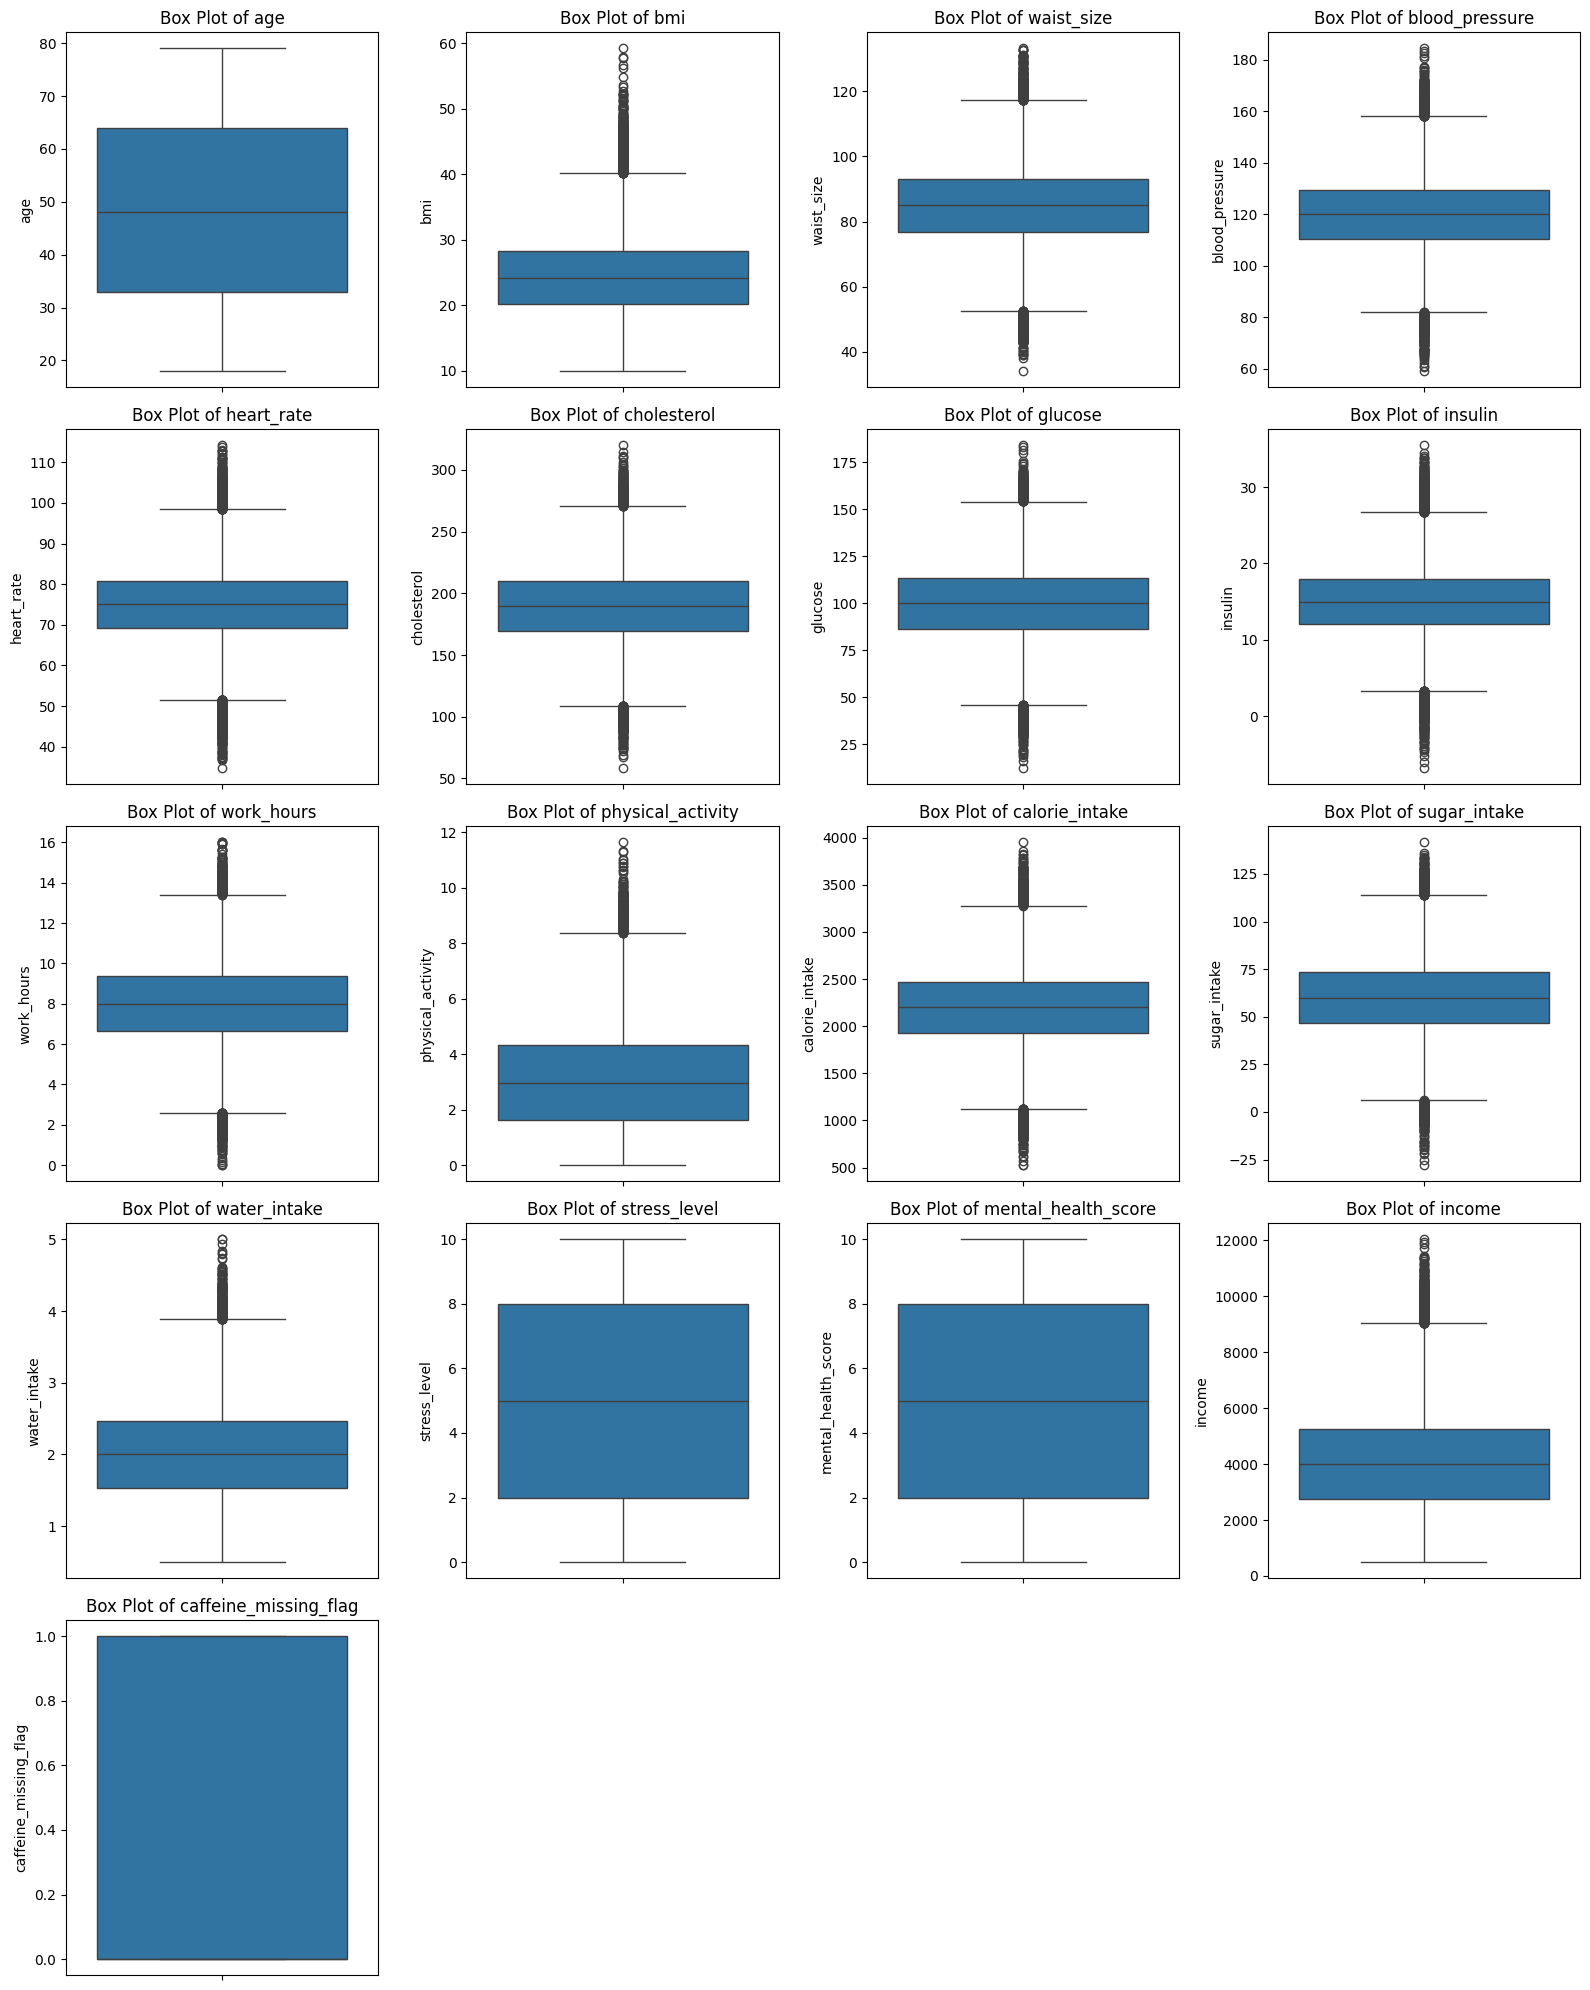

In [ ]:
# Set up the figure size and layout
num_cols = len(numerical_cols)
# Determine the number of rows and columns for the subplot grid
# Use up to 4 columns per row for readability
cols = 4
rows = (num_cols + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
# Flatten the axes array for easy iteration if it's a multi-dimensional array
axes = axes.flatten() if rows > 1 or cols > 1 else [axes]

# Iterate over each numerical column to create a box plot
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_filled[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('numerical_columns_outlier_boxplots.png')
print("Box plots saved to 'numerical_columns_outlier_boxplots.png'")

###Remove Outliers

In [ ]:
Q1=df_filled[numerical_cols].quantile(0.25)
Q3=df_filled[numerical_cols].quantile(0.75)
IQR=Q3-Q1

LB=Q1-(1.5*IQR)
UB=Q3+(1.5*IQR)

In [ ]:
(df_filled[numerical_cols] >= LB) & (df_filled[numerical_cols] <= UB)

,age,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,work_hours,physical_activity,calorie_intake,sugar_intake,water_intake,stress_level,mental_health_score,income,caffeine_missing_flag
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
99996,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
99997,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
99998,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
filter_mask = (
    (df_filled[numerical_cols] >= LB) & (df_filled[numerical_cols] <= UB)
).all(axis=1)

In [ ]:
df_cleaned = df_filled[filter_mask].copy()

print(f"Original shape: {df_filled.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (100000, 32)
Cleaned shape: (90027, 32)


###Feature Enginnering

In [ ]:
df_featured=df_cleaned.copy()

##### 1. BMI Category
Take `bmi` (or average of duplicates) and bucket into categories:
- **Underweight** (<18.5)  
- **Normal** (18.5–24.9)  
- **Overweight** (25–29.9)  
- **Obese** (≥30)  

**Why useful:** Disease risk is often more tied to BMI category than exact value.  

---

In [ ]:
bmi_bins=[0, 18.5, 25.0, 30.0, float('inf')]
bmi_labels=['Underweight', 'Normal', 'Overweight', 'Obese']

df_featured['bmi_cat']=pd.cut(
    df_featured['bmi'],
    bins=bmi_bins,
    labels=bmi_labels,
    right=False,
    include_lowest=True
)

##### 2. Age Group
Group ages into bins:
- **Young** (18–25)  
- **Adult** (26–40)  
- **Middle-aged** (41–60)  
- **Senior** (61+)  

**Why useful:** Risk patterns differ by age group.   

---

In [ ]:
age_bins=[18, 26, 41, 61, float('inf')]
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

df_featured['age_group']=pd.cut(
    df_featured['age'],
    bins=age_bins,
    labels=age_labels,
    right=False,
    include_lowest=True
)

##### 4. HOMA-IR (Glucose + Insulin)
**Formula:**  

$$
\text{HOMA-IR} = \frac{\text{Glucose} \times \text{Insulin}}{405}
$$

**Why useful:** Medical indicator of insulin resistance / diabetes risk.  

---

In [ ]:
df_featured['HOMA_IR']=(df_featured['glucose']*df_featured['insulin'])/405.0

df_featured['diabetes_risk_flag']=np.where(df_featured['glucose']>125, 'High Risk', 'Normal/Pre-Risk')

In [ ]:
df_featured.to_csv("featured_dataset.csv", index=False)

####Check data in the columns

In [ ]:
for col in df_featured.columns.tolist():
  print(f"{col}:{df_featured[col].value_counts()}\n")

age:age
71    1531
45    1516
38    1508
53    1504
34    1504
      ... 
67    1393
23    1391
50    1388
48    1386
60    1358
Name: count, Length: 62, dtype: int64

gender:gender
Male      45160
Female    44867
Name: count, dtype: int64

bmi:bmi
20.408163    5
24.652315    1
27.346872    1
15.262577    1
22.609945    1
            ..
22.898850    1
31.170033    1
24.888950    1
26.609420    1
24.532636    1
Name: count, Length: 90023, dtype: int64

waist_size:waist_size
70.743851     1
72.165130     1
85.598889     1
90.295030     1
100.504211    1
             ..
98.126084     1
91.419016     1
57.928536     1
96.475338     1
73.274294     1
Name: count, Length: 90027, dtype: int64

blood_pressure:blood_pressure
119.980149    18
127.944744     6
122.622448     5
120.549975     5
115.383211     5
              ..
105.090791     1
131.697712     1
115.949136     1
100.256586     1
104.094317     1
Name: count, Length: 89701, dtype: int64

heart_rate:heart_rate
72.801167    64
72.8011

In [ ]:
null_pct=((df_featured.isnull().sum()/len(df_featured))*100)
print(null_pct)

age                      0.0
gender                   0.0
bmi                      0.0
waist_size               0.0
blood_pressure           0.0
heart_rate               0.0
cholesterol              0.0
glucose                  0.0
insulin                  0.0
sleep_quality            0.0
work_hours               0.0
physical_activity        0.0
calorie_intake           0.0
sugar_intake             0.0
alcohol_consumption      0.0
smoking_level            0.0
water_intake             0.0
stress_level             0.0
mental_health_score      0.0
occupation               0.0
income                   0.0
diet_type                0.0
exercise_type            0.0
device_usage             0.0
healthcare_access        0.0
insurance                0.0
sunlight_exposure        0.0
caffeine_intake          0.0
family_history           0.0
pet_owner                0.0
target                   0.0
caffeine_missing_flag    0.0
bmi_cat                  0.0
age_group                0.0
HOMA_IR       

### Scaling the dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
df_scaled=df_featured.copy()

In [ ]:
num_cols=df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"length of numerical columns: {len(num_cols)}")
num_cols

length of numerical columns: 18


['age',
 'bmi',
 'waist_size',
 'blood_pressure',
 'heart_rate',
 'cholesterol',
 'glucose',
 'insulin',
 'work_hours',
 'physical_activity',
 'calorie_intake',
 'sugar_intake',
 'water_intake',
 'stress_level',
 'mental_health_score',
 'income',
 'caffeine_missing_flag',
 'HOMA_IR']

In [ ]:
cat_cols=df_scaled.drop(['bmi_cat', 'age_group', 'target'], axis=1).select_dtypes(include=['object', 'category']).columns.tolist()
print(f"length of categorical columns: {len(cat_cols)}")
cat_cols

length of categorical columns: 15


['gender',
 'sleep_quality',
 'alcohol_consumption',
 'smoking_level',
 'occupation',
 'diet_type',
 'exercise_type',
 'device_usage',
 'healthcare_access',
 'insurance',
 'sunlight_exposure',
 'caffeine_intake',
 'family_history',
 'pet_owner',
 'diabetes_risk_flag']

In [ ]:
cat_ordinal_cols=['bmi_cat', 'age_group']
target_col=['target']

In [ ]:
bmi_order = [['Underweight', 'Normal', 'Overweight', 'Obese']]
age_order = [['Young', 'Adult', 'Middle-aged', 'Senior']]

In [ ]:
len(df_scaled.columns.tolist())==(15+18+2+1)

True

In [ ]:
labelencoder=LabelEncoder()
standardencoder=StandardScaler()
ordinalencoder=OrdinalEncoder()
onehotencoder=OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [ ]:
df_scaled[num_cols] = standardencoder.fit_transform(df_scaled[num_cols])

In [ ]:
ordinalencoder = OrdinalEncoder(categories=bmi_order + age_order)

df_scaled[cat_ordinal_cols] = ordinalencoder.fit_transform(df_scaled[cat_ordinal_cols])

In [ ]:
onehot_encoded = onehotencoder.fit_transform(df_scaled[cat_cols])
onehot_encoded_df = pd.DataFrame(onehot_encoded,
                                 columns=onehotencoder.get_feature_names_out(cat_cols),
                                 index=df_scaled.index)

# Drop original categorical columns and concat new one-hot features
df_scaled = df_scaled.drop(columns=cat_cols).join(onehot_encoded_df)

In [ ]:
df_scaled['target'] = labelencoder.fit_transform(df_scaled['target'])

In [ ]:
df_scaled

,age,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,work_hours,physical_activity,...,healthcare_access_Moderate,healthcare_access_Poor,insurance_Yes,sunlight_exposure_Low,sunlight_exposure_Moderate,caffeine_intake_Moderate,caffeine_intake_Unknown,family_history_Yes,pet_owner_Yes,diabetes_risk_flag_Normal/Pre-Risk
0,0.416994,-0.951039,-1.093352,-0.122171,-1.618992,0.844326,0.156291,0.319893,-0.172886,-1.432026,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,1.144037,2.180337,0.055918,-0.146971,-0.969338,-2.546280,0.871736,-1.107124,0.776487,-1.318110,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.142269,0.237651,0.457677,0.222288,0.119831,-1.779488,-0.555598,0.911300,-1.121011,0.405010,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.925239,-0.528390,1.331081,2.019967,-0.705754,0.447451,1.462271,0.850478,0.763355,-1.144916,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.640700,-1.649889,-1.362322,2.194704,1.972212,0.358041,-0.265598,0.237252,-0.376707,-0.060139,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.249215,-1.236396,0.324645,1.082972,0.039674,0.089254,1.587319,0.645290,0.618815,-0.537158,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
99996,-1.484503,-2.124264,1.601024,1.089487,-2.121002,0.896601,1.606734,0.639376,0.396108,-0.552315,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
99997,-0.645607,0.041245,1.195587,1.900453,-0.014236,-0.394679,-0.817785,0.183451,-0.627309,-0.536108,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
99998,1.311817,-1.248789,-2.599564,-1.359608,-1.167593,-1.063978,-0.868918,1.170871,-0.835902,1.297504,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
df_scaled.iloc[:,:13]

,age,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,work_hours,physical_activity,calorie_intake,sugar_intake,water_intake
0,0.416994,-0.951039,-1.093352,-0.122171,-1.618992,0.844326,0.156291,0.319893,-0.172886,-1.432026,1.216251,-0.802162,-0.447750
1,1.144037,2.180337,0.055918,-0.146971,-0.969338,-2.546280,0.871736,-1.107124,0.776487,-1.318110,1.156534,0.753386,-1.887340
2,-0.142269,0.237651,0.457677,0.222288,0.119831,-1.779488,-0.555598,0.911300,-1.121011,0.405010,-1.172417,-2.078823,0.720641
3,-0.925239,-0.528390,1.331081,2.019967,-0.705754,0.447451,1.462271,0.850478,0.763355,-1.144916,-0.431588,1.161340,0.949471
4,0.640700,-1.649889,-1.362322,2.194704,1.972212,0.358041,-0.265598,0.237252,-0.376707,-0.060139,0.475683,-0.725667,-0.044175
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.249215,-1.236396,0.324645,1.082972,0.039674,0.089254,1.587319,0.645290,0.618815,-0.537158,-0.581744,-0.078675,-0.166354
99996,-1.484503,-2.124264,1.601024,1.089487,-2.121002,0.896601,1.606734,0.639376,0.396108,-0.552315,-0.447156,2.325440,-2.205936
99997,-0.645607,0.041245,1.195587,1.900453,-0.014236,-0.394679,-0.817785,0.183451,-0.627309,-0.536108,-0.625494,-0.403029,-1.571034
99998,1.311817,-1.248789,-2.599564,-1.359608,-1.167593,-1.063978,-0.868918,1.170871,-0.835902,1.297504,-0.104395,-0.765646,-1.059522


In [ ]:
df_scaled.iloc[:,13:24]

,stress_level,mental_health_score,income,target,caffeine_missing_flag,bmi_cat,age_group,HOMA_IR,gender_Male,sleep_quality_Fair,sleep_quality_Good
0,-0.947799,0.947933,1.512730,1,-0.706789,1.0,2.0,0.356944,1.0,1.0,0.0
1,-0.630620,1.264063,1.227639,1,-0.706789,3.0,3.0,-0.589562,0.0,0.0,1.0
2,-1.582157,-1.264976,-0.315748,1,-0.706789,2.0,2.0,0.366205,1.0,0.0,0.0
3,1.589633,-0.316586,-0.760798,0,1.414850,1.0,1.0,1.697502,0.0,0.0,1.0
4,1.272454,0.631803,-0.187885,1,-0.706789,0.0,2.0,0.040548,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0.320917,-1.581106,0.927758,1,-0.706789,0.0,2.0,1.561772,1.0,0.0,0.0
99996,-0.313441,1.580193,1.069959,1,1.414850,0.0,0.0,1.567986,1.0,0.0,0.0
99997,-0.947799,-0.632716,0.203215,1,1.414850,1.0,1.0,-0.319074,1.0,0.0,1.0
99998,-0.313441,0.315673,0.309158,1,-0.706789,0.0,3.0,0.327107,0.0,1.0,0.0


In [ ]:
df_scaled.iloc[:,24:30]

,sleep_quality_Poor,alcohol_consumption_Not Drinking,alcohol_consumption_Occasionally,alcohol_consumption_Regularly,smoking_level_Light,smoking_level_Non-smoker
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
99995,1.0,0.0,0.0,1.0,1.0,0.0
99996,0.0,0.0,1.0,0.0,1.0,0.0
99997,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
df_scaled.iloc[:,30:38]

,occupation_Doctor,occupation_Driver,occupation_Engineer,occupation_Farmer,occupation_Teacher,diet_type_Omnivore,diet_type_Vegan,diet_type_Vegetarian
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
99996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_scaled.iloc[:,38:45]

,exercise_type_Mixed,exercise_type_Strength,exercise_type_Undefined,device_usage_Low,device_usage_Moderate,healthcare_access_Moderate,healthcare_access_Poor
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0.0,1.0,0.0,1.0
99996,0.0,0.0,0.0,0.0,0.0,1.0,0.0
99997,1.0,0.0,0.0,1.0,0.0,0.0,0.0
99998,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df_scaled.iloc[:,45:54]

,insurance_Yes,sunlight_exposure_Low,sunlight_exposure_Moderate,caffeine_intake_Moderate,caffeine_intake_Unknown,family_history_Yes,pet_owner_Yes,diabetes_risk_flag_Normal/Pre-Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
99996,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
99997,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
99998,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
print(f"Shape of the scaled dataset: {df_scaled.shape}")

Shape of the scaled dataset: (90027, 53)


In [ ]:
print(df_scaled.isnull().sum())

age                                   0
bmi                                   0
waist_size                            0
blood_pressure                        0
heart_rate                            0
cholesterol                           0
glucose                               0
insulin                               0
work_hours                            0
physical_activity                     0
calorie_intake                        0
sugar_intake                          0
water_intake                          0
stress_level                          0
mental_health_score                   0
income                                0
target                                0
caffeine_missing_flag                 0
bmi_cat                               0
age_group                             0
HOMA_IR                               0
gender_Male                           0
sleep_quality_Fair                    0
sleep_quality_Good                    0
sleep_quality_Poor                    0


In [ ]:
corr_matrix=df_scaled.corr()
corr_matrix

,age,bmi,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,work_hours,physical_activity,...,healthcare_access_Moderate,healthcare_access_Poor,insurance_Yes,sunlight_exposure_Low,sunlight_exposure_Moderate,caffeine_intake_Moderate,caffeine_intake_Unknown,family_history_Yes,pet_owner_Yes,diabetes_risk_flag_Normal/Pre-Risk
age,1.000000,0.006693,-0.005549,0.005340,-0.006437,0.003934,0.000909,-0.002439,0.001885,-0.001670,...,-0.000615,-0.001104,-0.002423,0.001615,-0.001999,-0.007701,0.001774,0.002302,0.000913,0.003345
bmi,0.006693,1.000000,0.001656,-0.000578,-0.001375,0.000002,0.000632,0.001810,-0.003665,0.002032,...,-0.001521,0.004707,0.004202,0.003261,0.001624,0.003251,0.000054,0.000677,0.001176,-0.000845
waist_size,-0.005549,0.001656,1.000000,0.003363,0.000956,-0.002767,-0.001904,-0.005917,0.003722,-0.000760,...,-0.004443,0.008946,0.003943,-0.004637,0.006423,0.001898,-0.003862,-0.002957,-0.003556,0.002860
blood_pressure,0.005340,-0.000578,0.003363,1.000000,0.000299,0.000581,0.001962,0.001274,0.004882,-0.003235,...,-0.000843,0.003617,0.000563,0.004313,-0.001612,0.006447,0.002001,-0.002019,-0.000405,-0.002163
heart_rate,-0.006437,-0.001375,0.000956,0.000299,1.000000,-0.000645,-0.003068,-0.002759,-0.001443,0.001693,...,0.001892,-0.001930,-0.001404,-0.001507,0.003017,-0.004027,0.004401,0.002687,0.006901,-0.000290
cholesterol,0.003934,0.000002,-0.002767,0.000581,-0.000645,1.000000,-0.004009,0.007693,0.002986,0.000137,...,0.004621,-0.005885,-0.001371,0.003685,-0.000721,-0.000854,0.007637,0.004820,0.002062,-0.000677
glucose,0.000909,0.000632,-0.001904,0.001962,-0.003068,-0.004009,1.000000,-0.001917,-0.002095,0.004351,...,-0.000848,0.006079,-0.000078,-0.003210,0.000666,0.002203,-0.000702,0.002140,-0.004284,-0.588368
insulin,-0.002439,0.001810,-0.005917,0.001274,-0.002759,0.007693,-0.001917,1.000000,0.000876,-0.001353,...,0.002903,-0.005322,0.001046,0.001292,0.000257,-0.000945,-0.002677,-0.003621,-0.004932,-0.001010
work_hours,0.001885,-0.003665,0.003722,0.004882,-0.001443,0.002986,-0.002095,0.000876,1.000000,0.005031,...,-0.005134,0.000962,0.000628,-0.002221,0.000856,0.000004,0.002058,0.001669,0.002467,0.000823
physical_activity,-0.001670,0.002032,-0.000760,-0.003235,0.001693,0.000137,0.004351,-0.001353,0.005031,1.000000,...,-0.000462,0.001974,-0.006943,-0.004236,0.005618,-0.000543,0.000552,0.006259,0.001334,-0.001538


In [ ]:
print(corr_matrix['target'].sort_values(ascending=False).head(53))

target                                1.000000
diabetes_risk_flag_Normal/Pre-Risk    0.094330
work_hours                            0.005221
caffeine_missing_flag                 0.004963
caffeine_intake_Unknown               0.004963
occupation_Doctor                     0.004895
device_usage_Low                      0.004584
sleep_quality_Good                    0.004415
physical_activity                     0.004027
gender_Male                           0.003954
pet_owner_Yes                         0.003709
insurance_Yes                         0.003553
exercise_type_Mixed                   0.002858
alcohol_consumption_Regularly         0.002711
calorie_intake                        0.001992
healthcare_access_Moderate            0.001885
smoking_level_Non-smoker              0.001833
mental_health_score                   0.001744
diet_type_Omnivore                    0.001621
diet_type_Vegetarian                  0.001485
blood_pressure                        0.001000
sunlight_expo

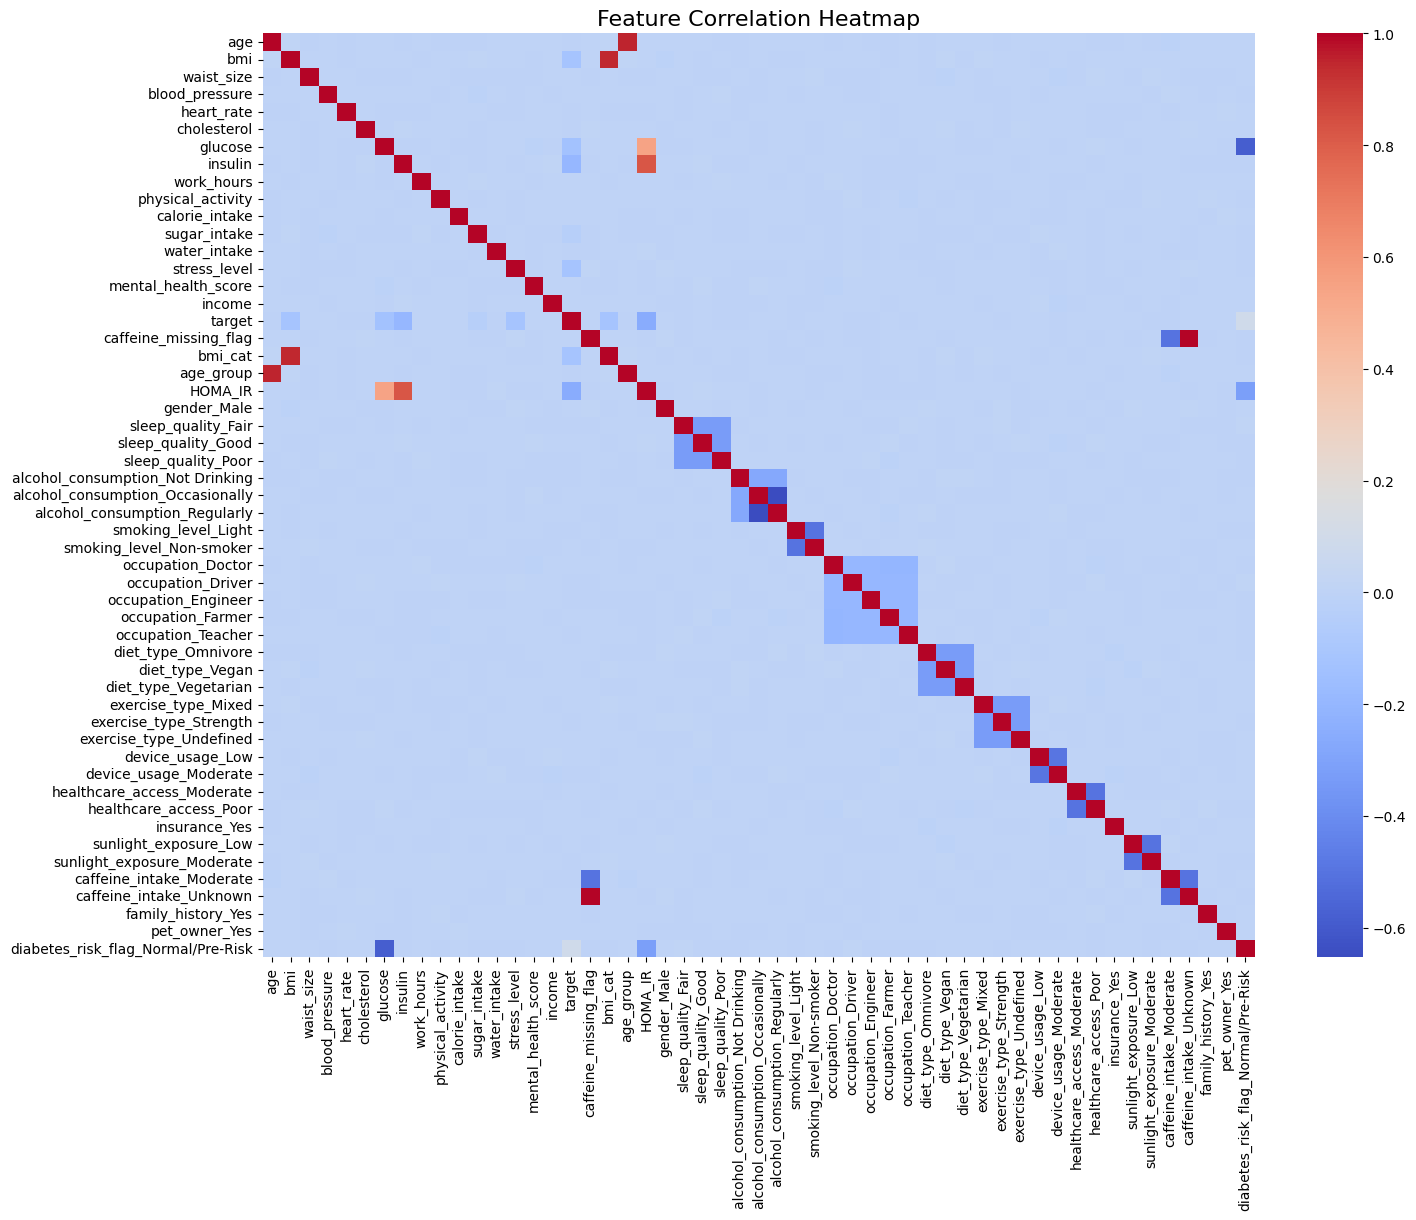

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            cbar=True,
            annot=False,
            fmt='.2f')
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi.head(53))

HOMA_IR                               0.053018
insulin                               0.022110
bmi_cat                               0.017097
diabetes_risk_flag_Normal/Pre-Risk    0.014384
gender_Male                           0.010715
family_history_Yes                    0.010556
stress_level                          0.010527
bmi                                   0.010439
glucose                               0.009958
pet_owner_Yes                         0.009529
insurance_Yes                         0.007894
smoking_level_Light                   0.005872
device_usage_Low                      0.005551
caffeine_intake_Moderate              0.005184
caffeine_intake_Unknown               0.004803
age_group                             0.004626
sunlight_exposure_Moderate            0.004052
alcohol_consumption_Occasionally      0.003860
caffeine_missing_flag                 0.003696
healthcare_access_Moderate            0.003412
exercise_type_Mixed                   0.003228
device_usage_

Since we use tree-based models

(RandomForest, XGBoost, LightGBM, CatBoost) → scaling & low correlations are less important, since trees handle them

In [ ]:
df_scaled.to_csv("scaled_dataset.csv", index=False)

##Split the data and Dimentionality reduction

###Address Class Imbalance

In [ ]:
print(df_scaled['target'].value_counts())

target
1    66657
0    23370
Name: count, dtype: int64


In [ ]:
df_balanced=df_scaled.copy()

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
X=df_scaled.drop(columns=['target'], axis=1)
y=df_scaled['target']

In [ ]:
print(f"Shape of x: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of x: (90027, 52)
Shape of y: (90027,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,
                                                    random_state=42, stratify=y)

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (72021, 52)
Shape of X_test: (18006, 52)
Shape of y_train: (72021,)
Shape of y_test: (18006,)


In [ ]:
smote=SMOTE(random_state=42)

In [ ]:
X_train_resampled, y_train_resampled=smote.fit_resample(X_train, y_train)

In [ ]:
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train_resampled: (106650, 52)
Shape of X_test: (18006, 52)
Shape of y_train_resampled: (106650,)
Shape of y_test: (18006,)


ADD THIS CODE BLOCK to your model training script BEFORE the PCA section:

In [ ]:
import json
final_features_list = X_train_resampled.columns.tolist()
with open('models/final_features_list.json', 'w') as f:
    json.dump(final_features_list, f)
print("Final feature list saved for consistent prediction ordering.")

Final feature list saved for consistent prediction ordering.


###Dimensionality Reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=0.90, random_state=42)
pca.fit(X_train_resampled)

PCA(n_components=0.9, random_state=42)

In [ ]:
X_train_pca=pca.transform(X_train_resampled)
X_test_pca=pca.transform(X_test)

In [ ]:
print(f"Original number of features: {X_train_resampled.shape[1]}")
print(f"Number of features after PCA (90% variance): {X_train_pca.shape[1]}")

Original number of features: 52
Number of features after PCA (90% variance): 29


##Model Training and Hyperparameter Tuning

###Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time

In [ ]:
models={
    "RandomFrorest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(random_state=42)
}

In [ ]:
results={}

In [ ]:
print("--- Starting Model Training and Evaluation using PCA data---")
for name, model in models.items():
  start_time=time.time()

  model.fit(X_train_pca, y_train_resampled)

  y_pred=model.predict(X_test_pca)
  y_proba=model.predict_proba(X_test_pca)[:,1]

  end_time=time.time()

  roc_auc=roc_auc_score(y_test, y_proba)
  report=classification_report(y_test, y_pred, output_dict=True)

  results[name]={
      "ROC_AUC": roc_auc,
      "Classification_Report": report,
      "Training_time": end_time-start_time
  }

  print(f"\n--- {name} Results ---")
  print(f"Training Time: {results[name]['Training_time']:.2f} seconds")
  print(f"ROC AUC Score: {results[name]['ROC_AUC']:.4f}")
  print(f"Classification Report:")
  print(classification_report(y_test, y_pred))

print("--- Training Complete ---")

--- Starting Model Training and Evaluation using PCA data---

--- RandomFrorest Results ---
Training Time: 178.40 seconds
ROC AUC Score: 0.6847
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.41      0.49      4674
           1       0.82      0.91      0.86     13332

    accuracy                           0.78     18006
   macro avg       0.71      0.66      0.68     18006
weighted avg       0.76      0.78      0.76     18006



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:30:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Results ---
Training Time: 4.19 seconds
ROC AUC Score: 0.6737
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.42      0.48      4674
           1       0.81      0.88      0.85     13332

    accuracy                           0.76     18006
   macro avg       0.68      0.65      0.66     18006
weighted avg       0.75      0.76      0.75     18006

[LightGBM] [Info] Number of positive: 53325, number of negative: 53325
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 106650, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- LightGBM Results ---
Training Time: 3.75 seconds
ROC AUC Score: 0.6847
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      4674
           1       0.82      0.89      0.85     13332

    accuracy                           0.77     18006
   macro avg       0.70      0.66      0.67     18006
weighted avg       0.75      0.77      0.76     18006

--- Training Complete ---


##Model Fine-Tuning (Hyperparameter Optimization)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
import time

In [ ]:
# Define the parameter grid for LightGBM
param_dist_lgbm = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [5, 8, 12, -1], # -1 means no limit
    'num_leaves': [20, 31, 50, 70],
    'min_child_samples': [10, 20, 50]
}

In [ ]:
# Initialize the LightGBM classifier
lgbm = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)

In [ ]:
# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist_lgbm,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

In [ ]:
start_time = time.time()
# Fit on the resampled training data (X_train_pca, y_train_resampled must be available)
random_search_lgbm.fit(X_train_pca, y_train_resampled)
end_time = time.time()

# Get the best model and evaluate its performance on the test set
best_lgbm_model = random_search_lgbm.best_estimator_
best_score_cv = random_search_lgbm.best_score_
y_proba_tuned = best_lgbm_model.predict_proba(X_test_pca)[:, 1]
roc_auc_tuned = roc_auc_score(y_test, y_proba_tuned)
y_pred_tuned = best_lgbm_model.predict(X_test_pca)

print(f"Tuning Time: {end_time - start_time:.2f} seconds")
print(f"Best ROC AUC during CV: {best_score_cv:.4f}")
print(f"Best Hyperparameters: {random_search_lgbm.best_params_}")
print(f"FINAL ROC AUC on Test Set (Tuned LightGBM): {roc_auc_tuned:.4f}")
print("Classification Report (Tuned LightGBM):")
print(classification_report(y_test, y_pred_tuned))

# Assign the best model for saving
final_model = best_lgbm_model

##Model Saving (Persistence)

In [ ]:
import joblib

In [ ]:
# The final_model variable now holds the best tuned LightGBM model
model_filename = 'final_diseased_prediction_model_lgbm_tuned.joblib'
joblib.dump(final_model, model_filename)

print(f"\n--- Model Saving Complete ---")
print(f"The final, tuned LightGBM model saved as: {model_filename}")
print(f"The final production model achieved an ROC AUC of: {roc_auc_tuned:.4f}")

In [ ]:
# import joblib
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
# from sklearn.impute import KNNImputer
# from sklearn.decomposition import PCA

# --- A. Save the KNN Imputer ---
# knn_imputer=KNNImputer(n_neighbors=5)
# ... fit and transform part
# After fitting the KNN Imputer:
# knn_impute_cols=['blood_pressure', 'heart_rate', 'insulin', 'income']
# Assuming you refit on the full data before saving, but in your script, it was:
# df_filled[knn_impute_cols]=knn_imputer.fit_transform(df_filled[knn_impute_cols])
# Rerun fit on the data frame *before* imputation for a clean fit:
# You must load 'df_dropped' again to fit correctly, or just save the fitted one.
# For simplicity, let's assume the fitted object from your script is saved:
joblib.dump(knn_imputer, 'models/knn_imputer.joblib')
print(f"knn_imputer.joblib saved")

# --- B. Save the Scaler, Encoders, and PCA ---

# --- B1. Get column lists (as defined in your script)
# df_scaled = df_featured.copy() # Use the featured dataset before scaling
# num_cols=df_scaled.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove engineered feature 'HOMA_IR' from num_cols if it's there, but your list includes it.
# Check your final 'num_cols' list in the script and ensure it's correct.
# cat_cols=df_scaled.drop(['bmi_cat', 'age_group', 'target'], axis=1).select_dtypes(include=['object', 'category']).columns.tolist()
# cat_ordinal_cols=['bmi_cat', 'age_group']

# --- B2. Initialize and Fit Objects (Replicating your script)
# labelencoder=LabelEncoder()
# standardencoder=StandardScaler()
# ordinalencoder=OrdinalEncoder()
# onehotencoder=OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Standard Scaler
# standardencoder.fit(df_scaled[num_cols])
joblib.dump(standardencoder, 'models/standard_scaler.joblib')
print(f"standard_scaler.joblib saved")

# Ordinal Encoder (For bmi_cat, age_group)
# bmi_order = [['Underweight', 'Normal', 'Overweight', 'Obese']]
# age_order = [['Young', 'Adult', 'Middle-aged', 'Senior']]
# ordinalencoder = OrdinalEncoder(categories=bmi_order + age_order)
# ordinalencoder.fit(df_scaled[cat_ordinal_cols])
joblib.dump(ordinalencoder, 'models/ordinal_encoder.joblib')
print(f"ordinal_encoder.joblib saved")

# One-Hot Encoder
# onehotencoder.fit(df_scaled[cat_cols])
joblib.dump(onehotencoder, 'models/one_hot_encoder.joblib')
print(f"one_hot_encoder.joblib saved")

# Label Encoder (For 'target' on full data, though not needed for prediction, good practice)
# labelencoder.fit(df_scaled['target'])
# Not strictly needed for prediction, but can be saved:
joblib.dump(labelencoder, 'models/label_encoder.joblib')
print(f"label_encoder.joblib saved")

# --- C. Save the PCA Object ---
# PCA was fitted on X_train_resampled in your script:
# pca.fit(X_train_resampled)
# Save the fitted PCA object:
joblib.dump(pca, 'models/pca_90_variance.joblib')
print(f"pca_90_variance.joblib saved")